In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
from os.path import join
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [13]:
from mylib import genomes

In [14]:
root_dir = join(Path.home(),"cp_als/populations")

In [21]:
def one_population(population_name:str,genomes):
    infile = join(root_dir,f"output/{population_name}/all.csv")
    df = pd.read_csv(infile)
    df = df[genomes[population_name] + ["gene"]]
    sdf = df.groupby(["gene"]).sum()
    tdf = sdf.transpose()
    return tdf

In [47]:
khv= one_population(population_name="KHV",genomes=genomes)
chb= one_population(population_name="CHB",genomes=genomes)
itu= one_population(population_name="ITU",genomes=genomes)
beb= one_population(population_name="BEB",genomes=genomes)
asw= one_population(population_name="ASW",genomes=genomes)
pur= one_population(population_name="PUR",genomes=genomes)

In [48]:
df=pd.concat([khv,chb,itu,beb,asw,pur])

In [49]:
df

gene,ALS2,ANG,ATXN2,C19ORF12,C9ORF72,CHCHD10,CHMP2B,CHRNA3,CREST,DAO,...,SOD1,SPG11,SQSTM1,TAF15,TARDBP,TUBA4A,VAPB,VCP,hnRNPA2B1,hnRNPa1
HG02069,4,0,6,11,14,1,14,23,103,3,...,0,50,15,36,0,0,38,1,0,0
HG01846,20,1,4,5,23,0,4,24,3,1,...,0,60,9,0,1,0,35,13,1,0
HG02078,2,0,4,1,15,1,8,16,4,8,...,0,58,10,2,1,0,25,1,7,0
HG01851,7,6,7,13,12,2,7,28,1,6,...,0,2,6,1,3,0,59,8,1,0
HG01865,24,8,12,11,11,1,1,19,88,2,...,0,93,9,2,5,0,17,0,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HG01102,3,8,163,18,24,2,9,18,7,0,...,0,8,15,2,3,0,23,5,0,0
HG00739,0,6,16,7,10,2,13,30,80,10,...,0,4,33,24,2,0,3,7,2,0
HG01095,14,0,21,16,6,0,7,27,5,20,...,0,3,14,1,2,0,13,7,8,0
HG01092,35,10,18,7,14,3,5,19,1,2,...,0,4,4,29,1,3,14,5,1,0


In [50]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [51]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [52]:
df['PC1'] = X_pca[:,0]
df['PC2'] = X_pca[:,1]

In [53]:
df.shape

(546, 38)

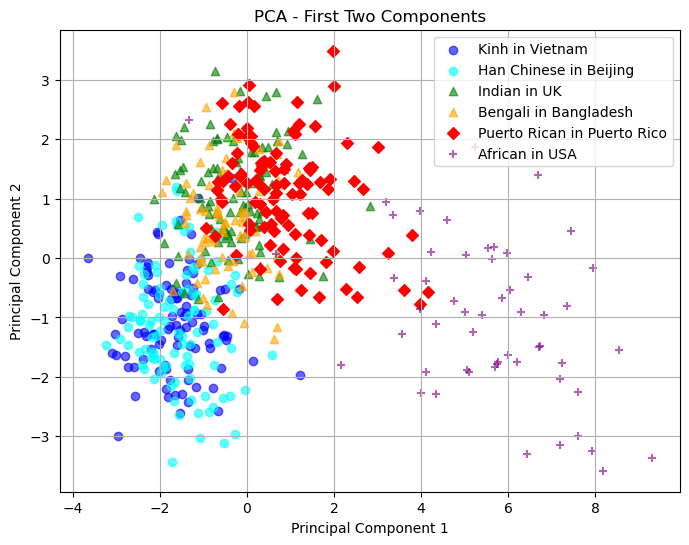

In [60]:
plt.figure(figsize=(8,6))
plt.scatter(df.loc[genomes["KHV"]]['PC1'],df.loc[genomes["KHV"]]['PC2'],c='blue',alpha = 0.6,label='Kinh in Vietnam',marker='o')
plt.scatter(df.loc[genomes["CHB"]]['PC1'],df.loc[genomes["CHB"]]['PC2'],c='cyan',alpha = 0.6,label='Han Chinese in Beijing',marker='o')
plt.scatter(df.loc[genomes["ITU"]]['PC1'],df.loc[genomes["ITU"]]['PC2'],c='green',alpha = 0.6,label='Indian in UK',marker='^')
plt.scatter(df.loc[genomes["BEB"]]['PC1'],df.loc[genomes["BEB"]]['PC2'],c='orange',alpha = 0.6,label='Bengali in Bangladesh',marker='^')
plt.scatter(df.loc[genomes["PUR"]]['PC1'],df.loc[genomes["PUR"]]['PC2'],c='red',alpha = 1,label='Puerto Rican in Puerto Rico',marker='D')
plt.scatter(df.loc[genomes["ASW"]]['PC1'],df.loc[genomes["ASW"]]['PC2'],c='purple',alpha = 0.6,label='African in USA',marker='+')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA - First Two Components')
plt.grid(True)
plt.show()